In [1]:
import pandas as pd
import plotly
#import chart_studio.plotly as py
import math
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.core.display import display, HTML
%matplotlib inline
import numpy as np
import plotly.graph_objs as go
import plotly.express as px
plotly.offline.init_notebook_mode(connected=True)

### Importing Data

In [2]:
can_df=pd.read_excel('Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

In [3]:
# Selecting rows and cols in the import statment
can_df1=pd.read_excel('Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),nrows=3,usecols=['AREA','REG','DEV','Type','Coverage'])
can_df1

,Type,Coverage,AREA,REG,DEV
0,Immigrants,Foreigners,935,5501,902
1,Immigrants,Foreigners,908,925,901
2,Immigrants,Foreigners,903,912,902


In [4]:
# drop all non-numeric cols
can_df1.select_dtypes(include=[np.number])


,AREA,REG,DEV
0,935,5501,902
1,908,925,901
2,903,912,902


### Renaming and Dropping Columns

In [5]:
# inplace=True helps avoiding assignment statment
# axis=0:rows:move down, axis=1:columns:move across
#dropping columns, provide column names in a list as input
can_df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
#renaming columns
can_df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region','DevName':'Dev Name'}, inplace=True)
can_df.head()

,Country,Continent,Region,Dev Name,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


### Dropping Rows

In [6]:
#dropping rows, provide rown number or index value is the input
can_df.drop(4, axis=0, inplace=True)
can_df.head()

,Country,Continent,Region,Dev Name,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,...,268,295,184,106,76,62,61,39,70,45


### Setting an index

In [7]:
#setting one of the columns as index
can_df.set_index('Country', inplace=True)
can_df.index.name='Country'
can_df.head()

,Continent,Region,Dev Name,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,5,...,268,295,184,106,76,62,61,39,70,45


### Resetting indexes to integers

In [8]:
# removing the columns as index, to go back to numerical indexes
can_df.reset_index(inplace=True)
can_df.head()

,Country,Continent,Region,Dev Name,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,...,268,295,184,106,76,62,61,39,70,45


### Formatting Column Names

In [9]:
#converting all columns to strings
can_df.columns=can_df.columns.astype(str)
#changing column names to replace space with underscores
can_df.columns = can_df.columns.str.replace(' ', '_')
can_df.head()

,Country,Continent,Region,Dev_Name,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,...,268,295,184,106,76,62,61,39,70,45


In [10]:
len(can_df)

194

In [11]:
can_df.shape

(194, 38)

### Exploring one Column

In [12]:
can_df['Continent']

0         Asia
1       Europe
2       Africa
3      Oceania
4       Africa
        ...   
189       Asia
190     Africa
191       Asia
192     Africa
193     Africa
Name: Continent, Length: 194, dtype: object

In [13]:
can_df['Continent'].value_counts()

Africa                             54
Asia                               49
Europe                             42
Latin America and the Caribbean    33
Oceania                            14
Northern America                    2
Name: Continent, dtype: int64

In [14]:
can_df['Continent'].value_counts(normalize=True)

Africa                             0.278351
Asia                               0.252577
Europe                             0.216495
Latin America and the Caribbean    0.170103
Oceania                            0.072165
Northern America                   0.010309
Name: Continent, dtype: float64

In [15]:
can_df['Continent'].unique()


array(['Asia', 'Europe', 'Africa', 'Oceania',
       'Latin America and the Caribbean', 'Northern America'],
      dtype=object)

In [16]:
can_df['Continent'].nunique()


6

### New Variable

In [17]:
# creting new series
# summing all numerical values 
can_df['Total']=can_df.sum(axis=1)
can_df.head()

,Country,Continent,Region,Dev_Name,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,...,295,184,106,76,62,61,39,70,45,2113


In [18]:
can_df.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,511.015464,569.912371,537.479381,389.432990,378.438144,360.711340,443.536082,694.695876,718.072165,847.587629,...,1327.097938,1273.484536,1197.958763,1252.819588,1282.309278,1427.608247,1269.041237,1320.726804,1327.505155,33036.793814
std,1954.288401,2157.825426,1871.430226,1207.125832,1201.039329,1081.792175,1228.338598,2114.074524,2449.386683,2560.936702,...,4436.386153,3935.817239,3451.382238,3703.040331,3838.434980,4473.319311,4039.484032,4257.490730,4247.849439,91992.431552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,1.000000,1.000000,1.000000,...,29.500000,27.500000,32.500000,32.000000,37.250000,42.250000,38.250000,43.500000,45.250000,952.000000
50%,13.500000,10.000000,11.500000,12.000000,13.500000,17.000000,19.500000,29.500000,35.000000,44.500000,...,210.500000,224.000000,198.000000,205.000000,215.500000,213.500000,187.500000,234.000000,215.000000,5442.000000
75%,256.750000,295.750000,282.500000,174.500000,182.000000,197.500000,255.500000,440.000000,409.500000,515.750000,...,841.500000,844.500000,914.000000,942.250000,896.000000,932.500000,788.000000,785.000000,807.000000,22431.750000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


In [19]:
can_df.describe(include=['object'])

,Country,Continent,Region,Dev_Name
count,194,194,194,194
unique,194,6,22,2
top,Montenegro,Africa,Western Asia,Developing regions
freq,1,54,18,147


### Sorting

In [20]:
# sorting data frame
can_df.sort_values('Total',ascending=False).head()

,Country,Continent,Region,Dev_Name,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
78,India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
35,China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
182,United Kingdom of Great Britain and Northern I...,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
135,Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
129,Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [21]:
# sorting series
can_df['1980'].sort_values(ascending=False).head()

182    22045
184     9378
78      8880
135     6051
35      5123
Name: 1980, dtype: int64

In [22]:
# sorting by two columns
can_df.sort_values(['1980','2013'],ascending=False).head()

,Country,Continent,Region,Dev_Name,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
182,United Kingdom of Great Britain and Northern I...,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
184,United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
78,India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
135,Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
35,China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962


In [23]:
can_df['Continent'].value_counts().sort_values()


Northern America                    2
Oceania                            14
Latin America and the Caribbean    33
Europe                             42
Asia                               49
Africa                             54
Name: Continent, dtype: int64

In [24]:
can_df['Continent'].value_counts().sort_index()


Africa                             54
Asia                               49
Europe                             42
Latin America and the Caribbean    33
Northern America                    2
Oceania                            14
Name: Continent, dtype: int64

### Filtering According to conditions

In [25]:
# Filtering countries with above average immigration totals
#filtering df
can_df[can_df['Total'] >= can_df['Total'].mean()].head()

,Country,Continent,Region,Dev_Name,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
13,Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
35,China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
38,Colombia,Latin America and the Caribbean,South America,Developing regions,266,326,360,244,235,214,...,6424,6535,5357,5452,4652,5218,4366,3741,3631,72088


In [26]:
#filtering series
can_df[can_df['Total'] >= can_df['Total'].mean()]['Country'].head()

0     Afghanistan
2         Algeria
13     Bangladesh
35          China
38       Colombia
Name: Country, dtype: object

In [27]:
# filtering with mutiple conditions
can_df[(can_df['Total'] >= can_df['Total'].mean())&(can_df['Continent']=='Asia')].head()

,Country,Continent,Region,Dev_Name,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
13,Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
35,China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
78,India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
80,Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923


In [28]:
# or conditions
can_df[(can_df['Total'] >= can_df['Total'].mean())|(can_df['Continent']=='Northern America')].head()

,Country,Continent,Region,Dev_Name,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
13,Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
31,Canada,Northern America,Northern America,Developed regions,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,2,20
35,China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962


In [29]:
#filtering with isin method
can_df[can_df['Region'].isin(['Southern Asia','Northern Africa'])].head()

,Country,Continent,Region,Dev_Name,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
13,Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
19,Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,...,5,10,7,36,865,1464,1879,1075,487,5876
54,Egypt,Africa,Northern Africa,Developing regions,612,660,755,455,447,348,...,2496,2190,2356,3347,3496,5982,4663,5555,4165,72745


### Iterating over series

In [30]:
#iterating over series
for i in can_df['Country'].head():
    print(i)

Afghanistan
Albania
Algeria
American Samoa
Angola


In [31]:
#iterating over data frame
for index, row in can_df.head().iterrows():
    print ((index, row['Continent'], row['Region']))

(0, 'Asia', 'Southern Asia')
(1, 'Europe', 'Southern Europe')
(2, 'Africa', 'Northern Africa')
(3, 'Oceania', 'Polynesia')
(4, 'Africa', 'Middle Africa')


### Subsetting by index values

In [32]:
#51st  and 52nd row
can_df.iloc[[50,51],:]

,Country,Continent,Region,Dev_Name,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
50,Djibouti,Africa,Eastern Africa,Developing regions,0,1,1,5,1,0,...,93,68,50,47,70,123,127,164,201,1646
51,Dominica,Latin America and the Caribbean,Caribbean,Developing regions,104,81,94,65,81,79,...,59,72,79,60,59,43,36,43,48,2470


In [33]:
#first and second column 
can_df.iloc[:,[0,1]]

,Country,Continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,American Samoa,Oceania
4,Angola,Africa
...,...,...
189,Viet Nam,Asia
190,Western Sahara,Africa
191,Yemen,Asia
192,Zambia,Africa


In [34]:
can_df.set_index('Country', inplace=True)
can_df.index.name='Country'
#using .loc to subset df
can_df.loc['Albania','Region']

'Southern Europe'

In [35]:
#subsetting mutiple rows and columns by name
can_df.loc[['Albania','India','China'],['Continent','Region']]

,Continent,Region
Country,,
Albania,Europe,Southern Europe
India,Asia,Southern Asia
China,Asia,Eastern Asia


In [36]:
#subsetting rows by condition in .loc
can_df.loc[can_df['Continent']=='Northern America',['Total']]

,Total
Country,
Canada,20
United States of America,241122


In [37]:
can_df.head()

,Continent,Region,Dev_Name,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,5,...,295,184,106,76,62,61,39,70,45,2113


### Using the "axis" parameter

In [38]:
can_df.mean(axis='index')
#can_df.mean(axis=0)

1980       511.015464
1981       569.912371
1982       537.479381
1983       389.432990
1984       378.438144
1985       360.711340
1986       443.536082
1987       694.695876
1988       718.072165
1989       847.587629
1990       969.335052
1991      1069.634021
1992      1142.711340
1993      1144.582474
1994       998.273196
1995       967.587629
1996      1031.365979
1997       994.252577
1998       828.479381
1999       926.896907
2000      1117.072165
2001      1250.731959
2002      1150.056701
2003      1120.077320
2004      1196.304124
2005      1327.097938
2006      1273.484536
2007      1197.958763
2008      1252.819588
2009      1282.309278
2010      1427.608247
2011      1269.041237
2012      1320.726804
2013      1327.505155
Total    33036.793814
dtype: float64

In [39]:
can_df.mean(axis='columns').head()
#can_df.mean(axis=1).head()

Country
Afghanistan       3350.800000
Albania            897.085714
Algeria           3967.942857
American Samoa       0.342857
Angola             120.742857
dtype: float64

### Using String Method

In [40]:
can_df['Continent'].str.upper().head()

Country
Afghanistan          ASIA
Albania            EUROPE
Algeria            AFRICA
American Samoa    OCEANIA
Angola             AFRICA
Name: Continent, dtype: object

In [41]:
can_df[can_df['Region'].str.contains('Asia')].head()

,Continent,Region,Dev_Name,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310
Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,359,236,203,125,165,209,138,161,57,2649
Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,0,...,12,12,22,9,35,28,21,39,32,475
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568


### Aggregation

In [42]:
#aggregating one col
# output series
can_df.groupby('Continent')['Total'].mean()

Continent
Africa                              11462.000000
Asia                                67710.081633
Europe                              33593.619048
Latin America and the Caribbean     23186.303030
Northern America                   120571.000000
Oceania                              3941.000000
Name: Total, dtype: float64

In [43]:
# reset index to output a df
can_df.groupby('Continent')['Total'].mean().reset_index()

,Continent,Total
0,Africa,11462.000000
1,Asia,67710.081633
2,Europe,33593.619048
3,Latin America and the Caribbean,23186.303030
4,Northern America,120571.000000
5,Oceania,3941.000000


In [44]:
# different types of agg on same col
can_df.groupby('Continent')['Total'].agg(['count', 'mean', 'min', 'max'])


,count,mean,min,max
Continent,,,,
Africa,54,11462.000000,2,72745
Asia,49,67710.081633,30,691904
Europe,42,33593.619048,5,551500
Latin America and the Caribbean,33,23186.303030,653,106431
Northern America,2,120571.000000,20,241122
Oceania,14,3941.000000,1,23829


In [45]:
# agg on mutiple column
can_df.groupby('Continent')['2013','1980'].agg(['count', 'mean', 'min', 'max'])


<ipython-input-45-1d678c61f396>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



2013                          1980  \
                                count         mean min    max count   
Continent                                                             
Africa                             54   713.759259   0   4331    54   
Asia                               49  3164.795918   1  34129    49   
Europe                             42   683.095238   0   5827    42   
Latin America and the Caribbean    33   756.060606   4   4152    33   
Northern America                    2  4251.500000   2   8501     2   
Oceania                            14   126.785714   0   1121    14   

                                                         
                                        mean min    max  
Continent                                                
Africa                             73.166667   0   1026  
Asia                              633.163265   0   8880  
Europe                            946.666667   0  22045  
Latin America and the Caribbean   396.393939   0   3198  
Northern America                 4689.000000   0   9378  
Oceania                           138.714286   0    702

### Cross-Tabs and Pivot-Tables

In [46]:
### counts intersection of two categorical variable
pd.crosstab(can_df['Continent'],can_df['Dev_Name'])

Dev_Name,Developed regions,Developing regions
Continent,,
Africa,0,54
Asia,1,48
Europe,42,0
Latin America and the Caribbean,0,33
Northern America,2,0
Oceania,2,12


In [47]:
gapminder_df=px.data.gapminder()
#gapminder_df=gapminder_df.columns.astype(str)
life_pivot=pd.pivot_table(gapminder_df,values='lifeExp',index='year',columns='continent',aggfunc='mean')
life_pivot

continent,Africa,Americas,Asia,Europe,Oceania
year,,,,,
1952,39.135500,53.27984,46.314394,64.408500,69.2550
1957,41.266346,55.96028,49.318544,66.703067,70.2950
1962,43.319442,58.39876,51.563223,68.539233,71.0850
1967,45.334538,60.41092,54.663640,69.737600,71.3100
1972,47.450942,62.39492,57.319269,70.775033,71.9100
1977,49.580423,64.39156,59.610556,71.937767,72.8550
1982,51.592865,66.22884,62.617939,72.806400,74.2900
1987,53.344788,68.09072,64.851182,73.642167,75.3200
1992,53.629577,69.56836,66.537212,74.440100,76.9450


In [48]:
life_pivot.loc[1952,'Africa']

39.1355

In [49]:
life_pivot.loc[[1952,1957,1997],['Africa','Asia']]

continent,Africa,Asia
year,,
1952,39.135500,46.314394
1957,41.266346,49.318544
1997,53.598269,68.020515


### Handling NULL Values

In [50]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [51]:
ufo.isnull().sum(axis=0)

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [52]:
ufo.head(10).isnull().sum(axis=1)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
dtype: int64

In [53]:
ufo[ufo.City.isnull()].head()


,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00


In [54]:
print(ufo.shape)
print('Any Method: Drops if any value is na',ufo.dropna(how='any').shape)
print('All Method: Drops if all value is na',ufo.dropna(how='all').shape)
## For mutiple columns
print(ufo.dropna(subset=['City', 'Shape Reported'], how='any').shape)

(18241, 5)
Any Method: Drops if any value is na (2486, 5)
All Method: Drops if all value is na (18241, 5)
(15576, 5)


In [55]:
# Value Counting na's
ufo['Shape Reported'].value_counts(dropna=False).head()

LIGHT       2803
NaN         2644
DISK        2122
TRIANGLE    1889
OTHER       1402
Name: Shape Reported, dtype: int64

In [56]:
#Replace na with
ufo['Shape Reported'].fillna(value='VARIOUS', inplace=True)
ufo['Shape Reported'].value_counts(dropna=False).head()

VARIOUS     2977
LIGHT       2803
DISK        2122
TRIANGLE    1889
OTHER       1402
Name: Shape Reported, dtype: int64

### Creating Dummy Variables 

In [57]:
dev_dummies = pd.get_dummies(can_df['Dev_Name'], prefix='Dev',drop_first=True)
can_df = pd.concat([can_df, dev_dummies], axis=1)
can_df.head()

,Continent,Region,Dev_Name,1980,1981,1982,1983,1984,1985,1986,...,2006,2007,2008,2009,2010,2011,2012,2013,Total,Dev_Developing regions
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3009,2652,2111,1746,1758,2203,2635,2004,58639,1
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,856,702,560,716,561,539,620,603,15699,0
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,4807,3623,4005,5393,4752,4325,3774,4331,69439,1
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,6,1
Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,5,...,184,106,76,62,61,39,70,45,2113,1


### Handling Date Time in Pandas

In [58]:
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [59]:
#ufo.Time.dt.hour.head()
#ufo.Time.dt.month.head()
ufo.Time.dt.year.head()

0    1930
1    1930
2    1931
3    1931
4    1933
Name: Time, dtype: int64

In [60]:
(ufo.Time.max() - ufo.Time.min()).seconds

7140

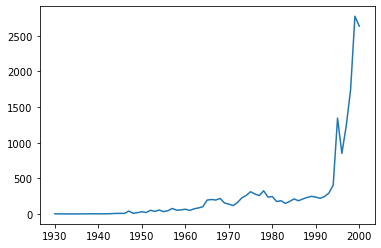

In [61]:
%matplotlib inline
ufo['Year'] = ufo.Time.dt.year
ufo['Year'].value_counts().sort_index().plot()

In [62]:
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_table('http://bit.ly/movieusers', sep='|', header=None, names=user_cols, index_col='user_id')
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


### Handling Duplicates

In [63]:
print(users.duplicated().head())
print('No of duplicate rows in df',users.duplicated().sum())

user_id
1    False
2    False
3    False
4    False
5    False
dtype: bool
No of duplicate rows in df 7


In [64]:
print(users.zip_code.duplicated().head())
print('No of duplicate rows in columns',users.zip_code.duplicated().sum())

user_id
1    False
2    False
3    False
4    False
5    False
Name: zip_code, dtype: bool
No of duplicate rows in columns 148


In [65]:
users.loc[users.duplicated(keep='first'), :]

,age,gender,occupation,zip_code
user_id,,,,
496,21,F,student,55414
572,51,M,educator,20003
621,17,M,student,60402
684,28,M,student,55414
733,44,F,other,60630
805,27,F,other,20009
890,32,M,student,97301


### Logic for duplicated:

* **keep='first'** (default): Mark duplicates as True except for the first occurrence.
* **keep='last'**: Mark duplicates as True except for the last occurrence.
* **keep=False**: Mark all duplicates as True.

In [66]:
users.drop_duplicates(keep='first').shape

(936, 4)

In [67]:
users.drop_duplicates(subset=['age', 'zip_code']).shape

(927, 4)